
Getting text (harry potter series 1-3)


In [9]:
# define a function to get .txt files in a folder
from os import listdir
def list_textfiles(directory):
    "Return a list of filenames ending in '.txt' in DIRECTORY."
    textfiles = []
    for filename in listdir(directory):
        if filename.endswith(".txt"):
            textfiles.append(directory + "/" + filename)
    return textfiles   

# define a function to read the text in a .txt file

def read_txt(filename):
    try:
        f = open(filename,'r')
        text = f.read()
    finally:
        if f:
            f.close()
    return text

#import harry potter textfiles
filenames = list_textfiles('HP')
raw_texts = []
for f in filenames:
    raw_texts.append(read_txt(f))
print len(raw_texts)

7


In [10]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(input='content')
# generate document term matrix
dtm = vectorizer.fit_transform(raw_texts)

# get the words as feature names

vocab = np.array(vectorizer.get_feature_names())

# fit_transform returns a sparse matrix (which uses less memory)
# but we want to work with a normal numpy array.
dtm = dtm.toarray()

# normalize counts to rates per 1000 words
rates = 1000 * dtm / np.sum(dtm, axis=1, keepdims=True)

print rates[:, 1000:1010]
print vocab[1000:1010]

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
[u'anthem' u'anthems' u'anthill' u'anthology' u'anthony' u'anti'
 u'anticheating' u'anticipated' u'anticipating' u'anticipation']


### Measuring distinctiveness

Here, in my texts, we will identify the unique words used in each harry potter book.

sklearn

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(input='content', min_df = 1, stop_words = 'english')

# Let’s execute the model against our corpus:
tfidf_matrix =  vectorizer.fit_transform(raw_texts)
feature_names = vectorizer.get_feature_names()

tfidfArray = tfidf_matrix.toarray()

print len(feature_names)

#print tfidfArray

22987


So we are got more than 10 thousands words.
View the top 5 terms of each news article based on the tfidf score

tfidf for article 1 is:


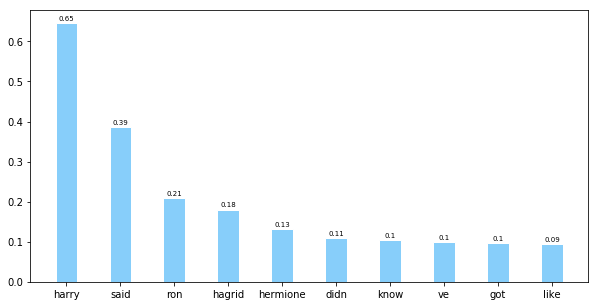

tfidf for article 2 is:


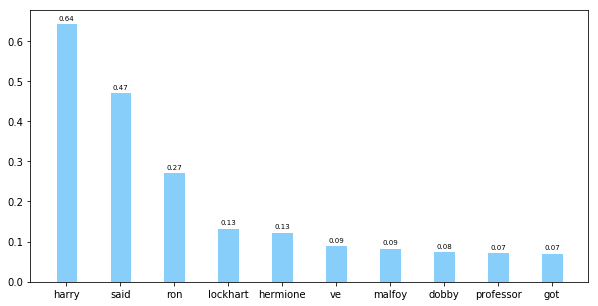

tfidf for article 3 is:


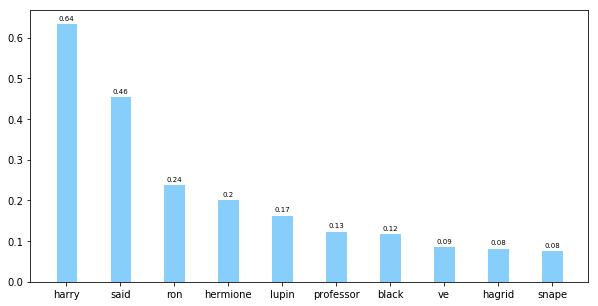

tfidf for article 4 is:


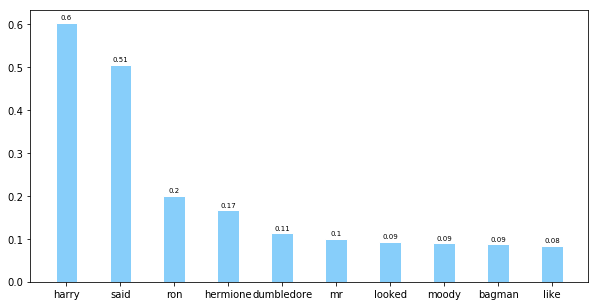

tfidf for article 5 is:


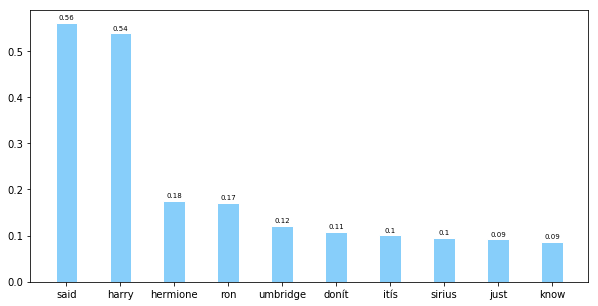

tfidf for article 6 is:


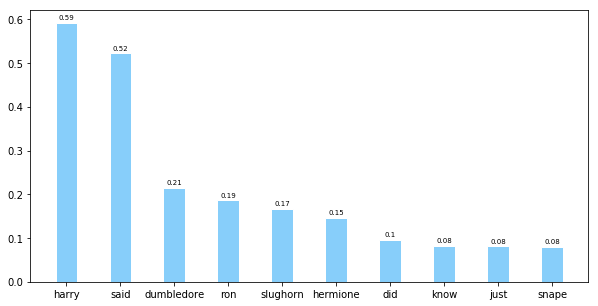

tfidf for article 7 is:


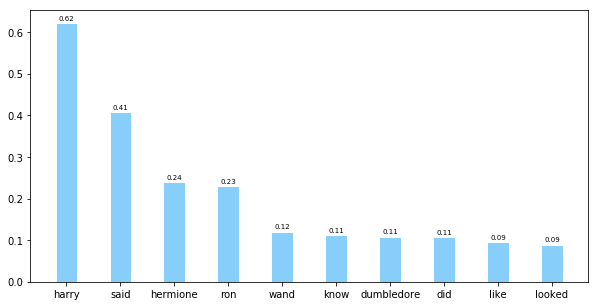

In [12]:
feature_names = vectorizer.get_feature_names()
li = [] #li is a list of tfidf (top 10 words) in the book.
tfidf = []
for l in tfidfArray:

    # sort tf-idf /How to explain this : ???
    #print [[feature_names[x],l[x]] for x in (l*-1).argsort()][:5]
    tfidf.append([(feature_names[x],l[x]) for x in (l*-1).argsort()][:10])


# plot the result
import numpy as np
from matplotlib import pyplot as plt

def plotTfidf (li): # parameter li is a list of tfidf (top 5 words) in the book. 
                    #e.g. [(u'pens', 0.43280168447929529), (u'the', 0.29211105475772814), (u'bit', 0.21640084223964764), (u'of', 0.2133540325973512), (u'am', 0.18396048627999845)]
    
    # set figure size
    fig = plt.figure(figsize=[10, 5])
    # plot tfidf of a given doc
    labels,Y = zip(*li) # See notes below
    X = np.arange(len(labels))
    plt.bar(X,Y,width = 0.4,facecolor = 'lightskyblue',edgecolor = 'white')  
    plt.xticks(X, labels)# stick labels on x axis
    for x,y in zip(X,Y):
        plt.text(x,y+0.005,round(y,2), ha='center', va= 'bottom',fontsize=7) #round(y,2): two decimals
    plt.show()    

i = 0
for doc in tfidf:
    print "tfidf for article " + str(i+1) +" is:"
    plotTfidf(doc)
    i +=1   
    

From the result, we can see that there are common words like 'harry' 'said' 'ron'...
This is because that the documents number is too small. So we need to set the max-df parameter, and filter out those words which have a really high df. Please see example here:
http://localhost:8888/notebooks/Desktop/temp/UofA%20/Learn%20python/machine%20learning/Feature%20selection_finding%20distinctive%20words(sklearn-CountVectorizer%2B%20TfidfTransformer)%20.ipynb
